Continuous-time model
---

Let's order the infection times $t_{\pi_{1}}<t_{\pi_{2}}<\dots<t_{\pi_{N}}$
. Let $\lambda_{i}\left(t\right)$ be a time-dependent transmission
rate and $L_{i}\left(t\right)=\int_{0}^{t}\lambda_{ij}\left(s\right)ds$
its primitive. Then $\rho_{i}\left(t_i; t_j\right)=\lambda_{i}\left(t_i\right)e^{-\int_{t_j}^{t_i}\lambda_{i}\left(s\right)ds} = \lambda_{i}\left(t_j\right)e^{L_{i}(t_j) - L_{i}(t_i) }$
will be the transmission ``delay'' density distribution. 

\begin{align*}p\left(t_{1},\dots,t_{N}\right) & =\prod_{i=1}^{N}\lim_{ds\to0^{+}}\frac{\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i}-ds)}-\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i})}}{ds}\\
 & =\prod_{i=1}^{N}\frac{d}{ds}_{|s=0}\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i}-ds)}\\
 & =\prod_{i=1}^{N}\left\{ \left(\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i})}\right)\sum_{j\in\partial i:t_{j}<t_{i}}\lambda_{i}\left(t_{i}\right)\right\} \\
\mathcal{L}_{0}\left(t_{1},\dots,t_{N}\right) & =\log p\left(t_{1},\dots,t_{N}\right)\\
 & =-\sum_{i=1}^{N}\left\{ \sum_{j\in\partial i:t_{j}<t_{i}}\left(L_{i}(t_{i})-L_{i}(t_{j})\right)-\log\left(\sum_{j\in\partial i:t_{j}<t_{i}}\lambda_{i}\left(t_{i}\right)\right)\right\} 
\end{align*}

Note that $$\int_{t_j}^{t_i} \rho_{i}(s; t_j) ds = 1-e^{-\left(L_{i}(t_i) - L_{i}(t_j)\right)}$$ so $$\lambda_{i}(t) = -\frac{d}{dt}\log \left(1-\int_{t_j}^{t_i} \rho_{i}(s) ds\right)$$


\begin{align}\lambda(t) & =ae^{-\left(\frac{t-b}{c}\right)^{2}}\\
\frac{x-b}{c} & =\frac{y}{\sqrt{2}}\\
dx & =\frac{c}{\sqrt{2}}dy\\
L(t)=\int_{0}^{t}ae^{-\left(\frac{x-b}{c}\right)^{2}}dx & = ac\int_{\frac{0-b}{c}}^{\frac{t-b}{c}}e^{-y^{2}}dy\\
 & =ac\sqrt{\pi}\frac{1}{\sqrt{\pi}}\int_{-\frac{b}{c}}^{\frac{t-b}{c}}e^{-y^{2}}dy\\
 & =\frac{ac\sqrt{\pi}}{2}\left(\mathrm{erfc}\left(-\frac{t-b}{c}\right)-\mathrm{erfc}\left(\frac{b}{c}\right)\right)\\
\rho_{i}\left(t_{i};t_{j}\right) & =\lambda_{i}\left(t_{i}\right)e^{-\int_{t_{j}}^{t_{i}}\lambda_{i}\left(s\right)ds}=\lambda_{i}\left(t_{i}\right)e^{L_{i}(t_{j})-L_{i}(t_{i})}\\
\frac{d}{ds}-e^{L_{i}(t_{j})-L_{i}(s)} & =\lambda\left(s\right)e^{L_{i}(t_{j})-L_{i}(s)}=\rho_{i}\left(s;t_{j}\right)\\
\end{align}

Sampling 
---
\begin{align}
\int_{t_{j}}^{t}\rho(s;t_{j})ds & =1-e^{L_{i}(t_{j})-L_{i}(t)}=1-r\sim U(0,1)\\
e^{L_{i}(t_{j})-L_{i}(t)} & =r\\
L_{i}(t) & =L_{i}\left(t_{j}\right)-\log(r)\\
\mathrm{erfc}\left(-\frac{t-b}{c}\right) & =\frac{2}{ac\sqrt{\pi}}\left(L_{i}\left(t_{j}\right)-\log(r)\right)+\mathrm{erfc}\left(\frac{b}{c}\right)\\
t & =-c\,\mathrm{ierfc}\left(\frac{2}{ac\sqrt{\pi}}\left(L_{i}\left(t_{j}\right)-\log(r)\right)+\mathrm{erfc}\left(\frac{b}{c}\right)\right)+b
\end{align}

In [1]:
using Causality
using IntervalUnionArithmetic

┌ Info: Precompiling Causality [943c2df0-3341-4665-8895-8aff0dd63d80]
└ @ Base loading.jl:1423
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **



In [2]:
using SparseArrays, LinearAlgebra
T, N = 20.0, 30
ρ = 3/N
G = Causality.makeGNP(N,ρ)

Causality.SparseMatrixDiGraph{Int64}(sparse([8, 9, 10, 17, 22, 23, 26, 27, 13, 6  …  4, 5, 22, 14, 24, 26, 7, 12, 15, 20], [1, 1, 1, 1, 1, 1, 1, 1, 2, 3  …  28, 28, 28, 29, 29, 29, 30, 30, 30, 30], [π, π, π, π, π, π, π, π, π, π  …  π, π, π, π, π, π, π, π, π, π], 30, 30), sparse([8, 9, 10, 17, 22, 23, 26, 27, 13, 6  …  4, 5, 22, 14, 24, 26, 7, 12, 15, 20], [1, 1, 1, 1, 1, 1, 1, 1, 2, 3  …  28, 28, 28, 29, 29, 29, 30, 30, 30, 30], [27, 29, 32, 46, 62, 66, 78, 80, 37, 23  …  20, 22, 65, 41, 74, 79, 26, 36, 43, 60], 30, 30))

In [3]:
getpar(pseed,autoinf::GaussianRate,inf_in::GaussianRate) = 
    [fill(pseed, 1, N);
     fill(autoinf.a, 1, N); fill(autoinf.b, 1, N); fill(autoinf.c, 1, N);
     fill(inf_in.a,   1, N); fill(inf_in.b, 1, N); fill(inf_in.c, 1, N)]


getpar(pseed,autoinf::GaussianRate,inf_in::GaussianRate, latency::GaussianRate, recov::GaussianRate) = 
    [fill(pseed, 1, N);
     fill(autoinf.a, 1, N); fill(autoinf.b, 1, N); fill(autoinf.c, 1, N);
     fill(inf_in.a,   1, N); fill(inf_in.b, 1, N); fill(inf_in.c, 1, N);
     fill(latency.a, 1, N); fill(latency.b, 1, N); fill(latency.c, 1, N);
     fill(recov.a, 1, N); fill(recov.b, 1, N); fill(recov.c, 1, N)
    ]

getpar (generic function with 2 methods)

In [4]:
#Initialize generation parameters
ε = 1e-10
λ = 0.1
pseed = 1/N 
autoinf = GaussianRate(ε, T/2, 1/ε)
inf_in = GaussianRate(1.0, T/2, 1/ε)
latency = GaussianRate(2.5, T/2, T)
recov = GaussianRate(0.1, T/2, T)
θp = getpar(pseed, autoinf, inf_in, latency, recov);

In [5]:
#Initialize min/max boundaies
pseed_min = ε
pseed_max = 1-ε
rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  2T,   1/ε)
θmin = getpar(pseed_min , rate_min, rate_min, rate_min, rate_min);
θmax = getpar(pseed_max , rate_max, rate_max, rate_max, rate_max);

In [6]:
const I = IndividualSEIR{GaussianRate,GaussianRate,GaussianRate,GaussianRate}

IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate}

In [9]:
Mp = StochasticModel(I, T, θp, G, ConstantRate(λ));
sample! = Sampler(Mp);

In [10]:
#Initialize softened model
ε = 2e-3
pseed = 1/N 
autoinf = GaussianRate(ε, T/2, 1000000.)
inf_in = GaussianRate(1.0, T/2, 1/ε)
θp2 = getpar(pseed, autoinf, inf_in, latency, recov);
Mp2 = StochasticModel(I, T, θp2, G, ConstantRate(λ));

In [11]:
#Initialize the parameters to learn
θ = getpar(pseed, autoinf, inf_in,  latency, recov);
M = StochasticModel(I, T, θ, G, ConstantRate(λ));

In [15]:
xtrue = zeros(N,3)
sample!(xtrue)
nobs, p = 5, 1e-6
O = [(ti = T*(1+rand())/2; (i,xtrue[i,2] < ti < xtrue[i,3],ti,p)) for i=1:nobs]

5-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 0, 17.95723381367703, 1.0e-6)
 (2, 1, 19.194556850831503, 1.0e-6)
 (3, 1, 14.793944759070268, 1.0e-6)
 (4, 0, 16.319772347213025, 1.0e-6)
 (5, 0, 10.99935235091393, 1.0e-6)

In [16]:
#using ProgressMeter
#ProgressMeter.ijulia_behavior(:clear)
descend!(Mp2, O; M=M, numsamples=500, numiters=100, 
         θmin=θmin, θmax=θmax, descender=SignDescender(0.1));
descend!(Mp2, O; M=M, numsamples=1000, numiters=100, 
         θmin=θmin, θmax=θmax, descender=SignDescender(0.05));

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter /home/students/mmariani/.julia/packages/ProgressMeter/Vf8un/src/ProgressMeter.jl:620
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
  F:  1.7048881083562668


In [17]:
function histo(v; bins=20, up=1.0)
    h = zeros(bins+1)
    z = length(v)
    for x in v
        h[floor(Int, x*bins/up)+1]+=1/z
    end
    h
end

histo (generic function with 1 method)

In [38]:
stats = post(Mp, O, numsamples=10000);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:16


In [42]:
statscau = prior(M);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


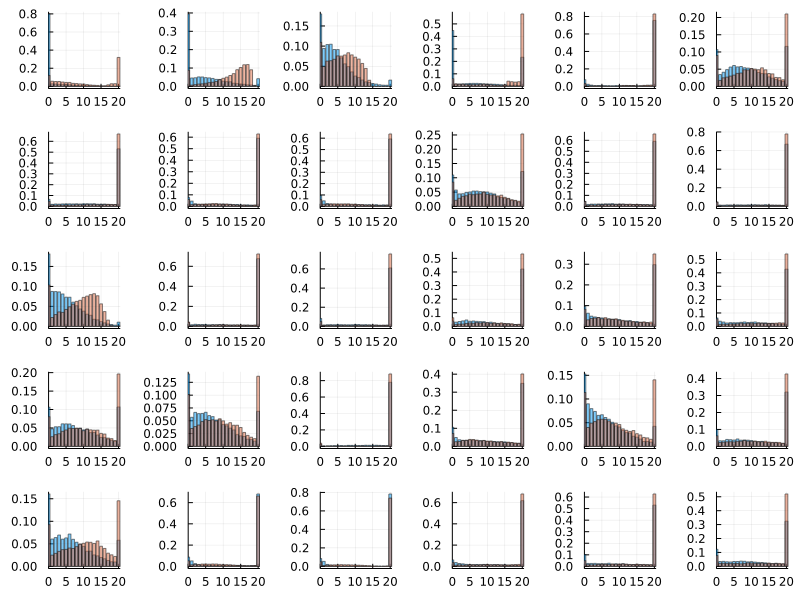

In [45]:
using Plots
pl = map(1:N) do k
    p = plot()
    bar!(p, 0:M.T/20:M.T, histo((@view statscau[:, k, 1]), up=M.T), alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="cau", legend=false);
    bar!(p, 0:M.T/20:M.T, histo((@view stats[:, k, 1]), up=M.T),    alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="true", legend=false);
end;
plot(pl..., size=(800,600))

In [46]:
function histow(v, weights; bins=20, up=1.0)
    h = zeros(bins+1)
    for (x,w) in zip(v,weights)
        h[floor(Int, x*bins/up)+1]+=w
    end
    h
end

histow (generic function with 1 method)

In [55]:
statsw, w = reweighted_post(Mp2, M, O; numsamples=10^6);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:39


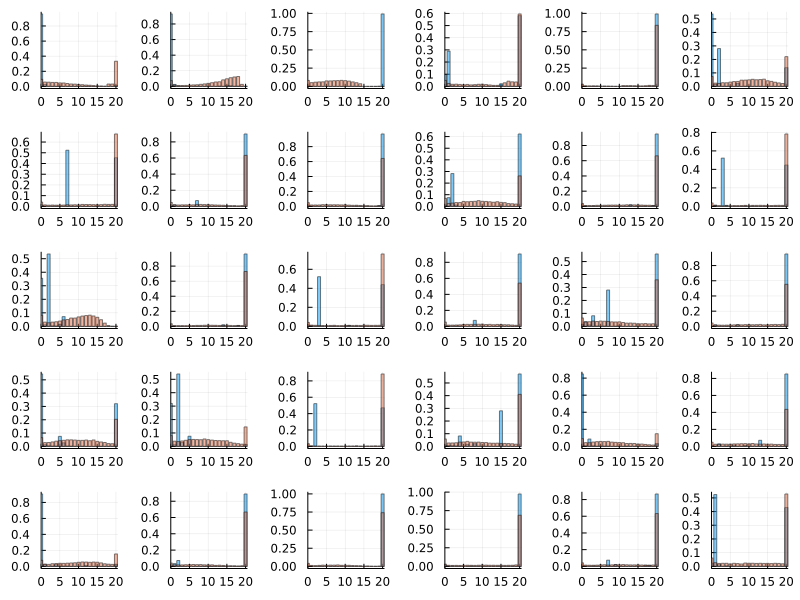

In [57]:
using Plots
pl = map(1:N) do k
    p = plot()
    bar!(p, 0:M.T/20:M.T, histow((@view statsw[:, k, 2]),w, up=M.T), alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="cau", legend=false);
    bar!(p, 0:M.T/20:M.T, histo((@view stats[:, k, 2]), up=M.T),    alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="true", legend=false);
end;
plot(pl..., size=(800,600))

## Marginals and ROC curve

In [61]:
function marginal(i, t, stats)
    numsamp = size(stats,1)
    sum((stats[:,i,2] .< t) .* (stats[:,i,3] .> t) )/numsamp
end

function marginalweight(i, t, stats, weight)
    sum((stats[:,i,2] .< t) .* (stats[:,i,3] .> t) .* weight)
end

function tpr(xtrue, rank) 
    cumsum(xtrue[rank]) ./( cumsum(xtrue[rank])[end])
end

function fpr(xtrue, rank) 
    N = size(rank,1)
    return (range(1,N,length=N) .- cumsum(xtrue[rank])) ./ (range(1,N,length=N) .- cumsum(xtrue[rank]) )[end]
end

function ROC(xtrue, p)
    N = size(xtrue,1)
    rank = sortperm(p, rev=true)
    
    return fpr(xtrue, rank) , tpr(xtrue, rank)
end

function AUROC(ROC)
    N = size(ROC[1],1) 
    AU = 0
    for t = 1:N-1
        AU += ROC[2][t] * (ROC[1][t+1] - ROC[1][t])
    end
    return AU
end

AUROC (generic function with 1 method)

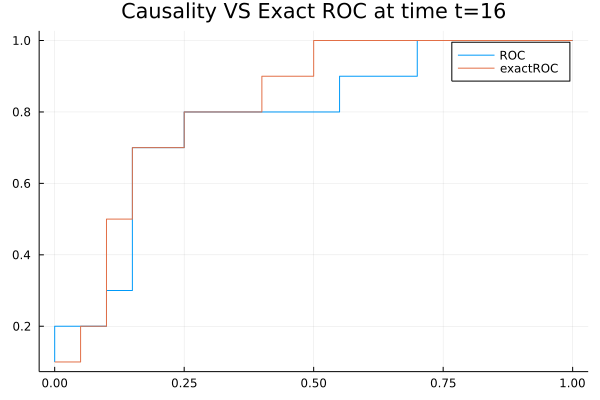

In [68]:
#Let us find the ROC of the infected individuals at time t

t = 16
epidemic_risk=zeros(N)
true_risk=zeros(N)
for i=1:N
   epidemic_risk[i] = marginal(i,t,statscau)
   true_risk[i] = marginal(i,t,stats)
end
xt = xtrue[:,2] .< t .< xtrue[:,3]
plot(ROC(xt, epidemic_risk)[1],ROC(xt, epidemic_risk)[2], label="ROC", title="Causality VS Exact ROC at time t=$t")
plot!(ROC(xt, true_risk)[1],ROC(xt, true_risk)[2], label="exactROC")

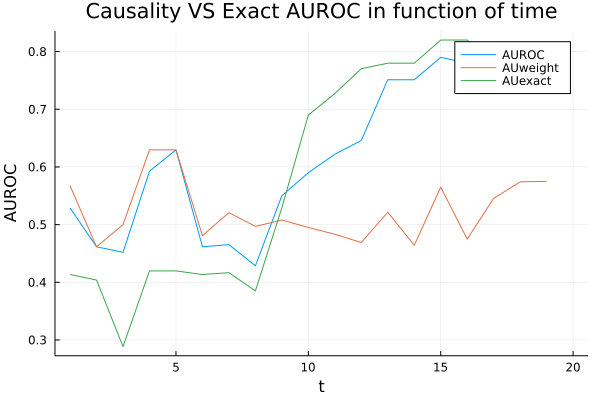

In [69]:
T = Int(T)
AU_curve=zeros(T)
AU_weight=zeros(T)
AU_exact=zeros(T)
for t = 1:T
    epidemic_risk=zeros(N)
    true_risk=zeros(N)
    weight_risk = zeros(N)
    for i=1:N
       epidemic_risk[i] = marginal(i,t,statscau)
       true_risk[i] = marginal(i,t,stats)
       weight_risk[i] = marginalweight(i,t,statsw, w)
    end
    xt = xtrue[:,2] .< t .< xtrue[:,3]
    AU_curve[t] = AUROC(ROC(xt, epidemic_risk))
    AU_weight[t] = AUROC(ROC(xt, weight_risk))
    AU_exact[t] = AUROC(ROC(xt, true_risk))
end

plot(LinRange(1,T,T),AU_curve, label="AUROC", title="Causality VS Exact AUROC in function of time")
plot!(LinRange(1,T,T),AU_weight, label="AUweight")
plot!(LinRange(1,T,T),AU_exact, label="AUexact")
xlabel!("t")
ylabel!("AUROC")